<a href="https://colab.research.google.com/github/cjrincon/Proyecto_Deep_Learning/blob/main/01_An%C3%A1lisis_exploratorio_y_preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis exploratorio y preprocesado**

El proyecto pretende predecir la vida útil remanente (RUL) en número de ciclos o tiempo que le resta a la batería a partir de la información recolectada de variables como:

**Datos de entrada**
- Ciclo
- Temperatura ambiente (°C)
- Fecha (fecha y hora de inicio del ciclo)
- Voltaje de la batería (Voltios)
- Corriente de la batería (Amperios)
- Temperatura de la batería (°C)
- Corriente de carga (Amperios)
- Voltaje de carga (Voltios)
- Tiempo (tiempo del ciclo en segundos)
- Capacidad de la batería (Amperios/h)
- Estado de salud (SOH) - Variable calculada en %

**Datos de salida**
- Vida Útil Remanente (RUL)

**Predicción:** se realizará a partir de diferentes modelos de deep learning, tomando como modelo base, una red LSTM para la predicción.


**Datos:** Se usa para la predicción un conjunto de datos de 4 baterías de la NASA. Los datos originales se encuentran en formato matlab, .mat y están disponibles en el enlace:
https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/#battery

## Cargar las librerías necesarias para el desarrollo del proyecto

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

## Lectura de los datos

In [ ]:
# Lectura de datos desde github
# Datos de la batería #5
url_5 = 'https://raw.githubusercontent.com/cjrincon/Proyecto_Deep_Learning/main/data/raw_data_05.csv'
bat_5 = pd.read_csv(url_5, delimiter=',')
# Datos de la batería #6
url_6 = 'https://raw.githubusercontent.com/cjrincon/Proyecto_Deep_Learning/main/data/raw_data_06.csv'
bat_6 = pd.read_csv(url_6, delimiter=',')
# Datos de la batería #7
url_7 = 'https://raw.githubusercontent.com/cjrincon/Proyecto_Deep_Learning/main/data/raw_data_07.csv'
bat_7 = pd.read_csv(url_7, delimiter=',')
# Datos de la batería #18
url_18 = 'https://raw.githubusercontent.com/cjrincon/Proyecto_Deep_Learning/main/data/raw_data_18.csv'
bat_18 = pd.read_csv(url_18, delimiter=',')

In [ ]:
bat_5.head()

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000
1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781
2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703
3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781
4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922


In [ ]:
# Se agrega una columna para identificar cada tipo de batería
bat_5 = bat_5.assign(battery=5)
bat_6 = bat_6.assign(battery=6)
bat_7 = bat_7.assign(battery=7)
bat_18 = bat_18.assign(battery=18)

In [ ]:
# Se crea una base de datos consolidando los datos de las 4 baterías
data = pd.concat([bat_5, bat_6, bat_7, bat_18])
data

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,battery
0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,5
1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,5
2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,5
3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,5
4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,5
...,...,...,...,...,...,...,...,...,...,...,...
34861,132,24,2008-08-20 08:37:19,1.341051,3.443760,-0.002426,35.383979,0.0006,0.000,2686.359,18
34862,132,24,2008-08-20 08:37:19,1.341051,3.453271,-0.000981,35.179732,0.0006,0.000,2700.546,18
34863,132,24,2008-08-20 08:37:19,1.341051,3.461963,0.000209,34.977000,0.0006,0.000,2714.640,18
34864,132,24,2008-08-20 08:37:19,1.341051,3.469907,0.001516,34.785943,0.0006,0.000,2728.750,18


## Análisis exploratorio de los datos

In [ ]:
# Se valida el tipo de dato y si hay nulos en la base de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185721 entries, 0 to 34865
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   cycle                 185721 non-null  int64  
 1   ambient_temperature   185721 non-null  int64  
 2   datetime              185721 non-null  object 
 3   capacity              185721 non-null  float64
 4   voltage_measured      185721 non-null  float64
 5   current_measured      185721 non-null  float64
 6   temperature_measured  185721 non-null  float64
 7   current_load          185721 non-null  float64
 8   voltage_load          185721 non-null  float64
 9   time                  185721 non-null  float64
 10  battery               185721 non-null  int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 17.0+ MB


In [ ]:
# Se validan las medidas estadísticas de cada columna
data.describe()

,cycle,ambient_temperature,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,battery
count,185721.000000,185721.0,185721.000000,185721.000000,185721.000000,185721.000000,185721.000000,185721.000000,185721.000000,185721.000000
mean,82.838758,24.0,1.574863,3.497219,-1.832569,32.378997,1.465434,2.366494,1546.379935,8.252799
std,45.692247,0.0,0.190633,0.251691,0.561405,4.027737,1.226874,0.751377,906.958628,4.743428
min,1.000000,24.0,1.153818,1.737030,-2.029098,22.350256,-2.000000,0.000000,0.000000,5.000000
25%,45.000000,24.0,1.426025,3.377653,-2.011418,29.570621,1.998200,2.410000,764.797000,5.000000
50%,81.000000,24.0,1.559634,3.500859,-2.009015,32.355737,1.998800,2.558000,1537.031000,6.000000
75%,120.000000,24.0,1.741850,3.655751,-1.989974,35.420677,1.999000,2.718000,2307.485000,7.000000
max,168.000000,24.0,2.035338,4.233325,0.014306,42.332522,2.000000,4.249000,3690.234000,18.000000


Se leen los datos, se crea una nueva columna para identificar los datos de cada una de las baterías: #5, #6, #7, #18 y se consolida la información de las 4 baterías en un dataset.

Según las validaciones, se tienen 185.721 filas en el dataset, no se tienen datos nulos en el dataset.

Según las medidas estadísticas del dataset, la temperatura ambiente es una constante para las 4 baterías y tiene un valor de 24. La variable capacidad tiene un mínimo de 1.15 y un máximo de 2.03 con una media cercana a la mediana, lo que permite concluir que los datos son homogéneos.

También se observa que el voltaje medido varía de 1.73 voltios a 4.23 voltios, donde la media y la mediana también tienen valores cercanos. En el caso del voltaje de carga, se observan valores mínimos de 0 y valores máximos cercanos a los valores máximos obtenidos en el voltaje medido.

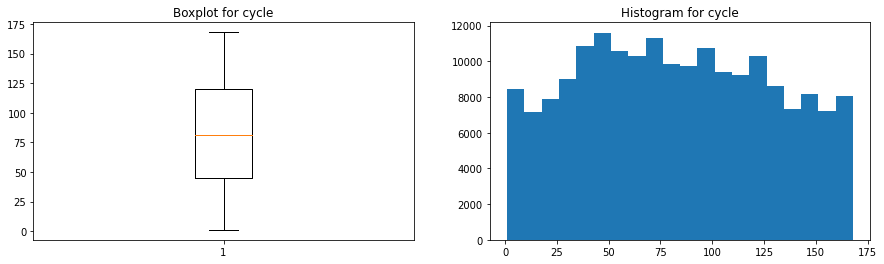

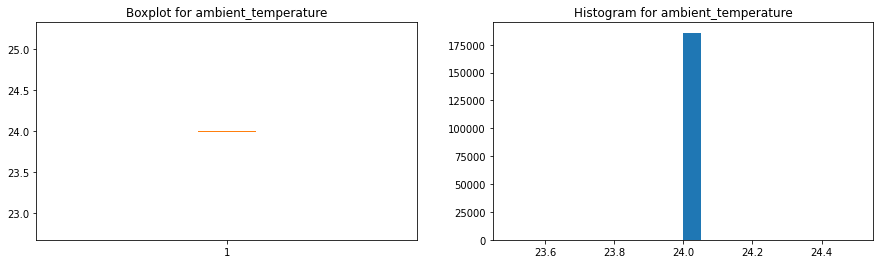

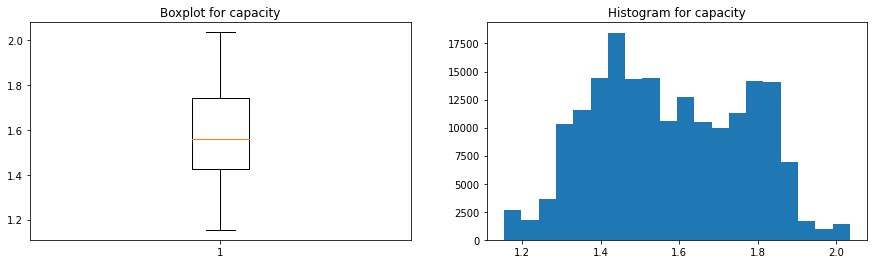

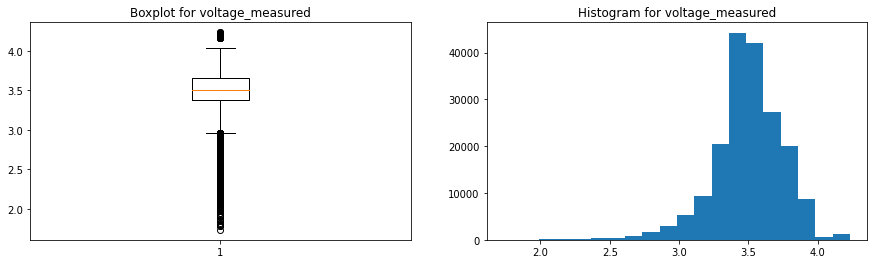

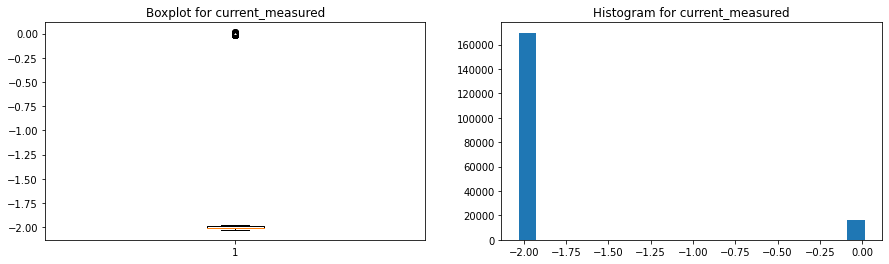

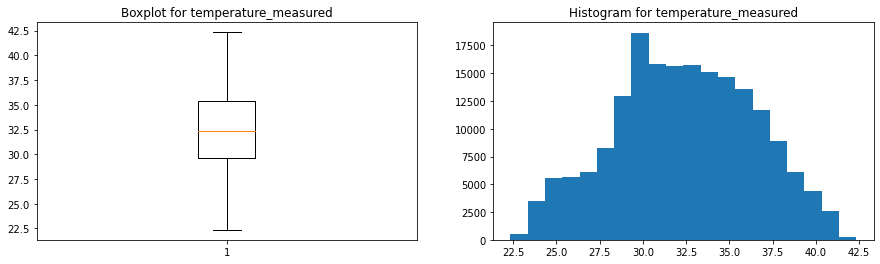

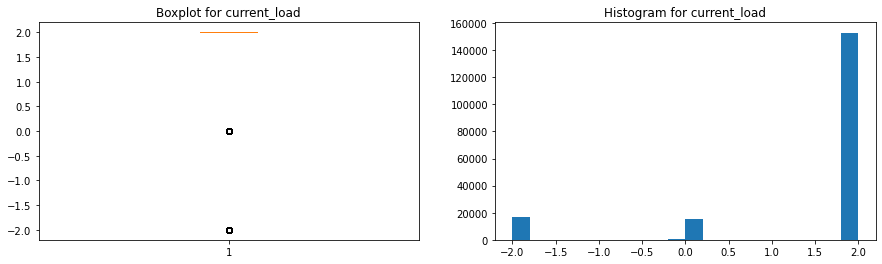

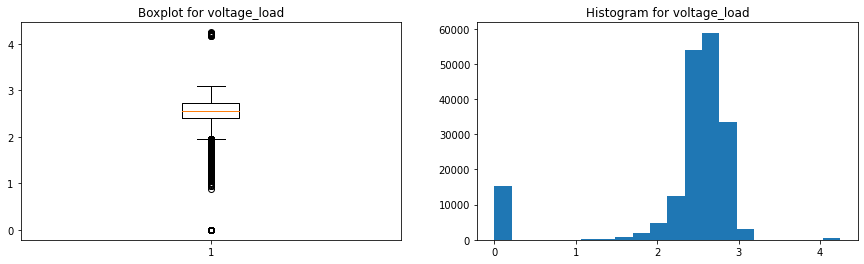

In [ ]:
variables = ['cycle', 'ambient_temperature', 'capacity', 'voltage_measured', 'current_measured', 
                    'temperature_measured', 'current_load', 'voltage_load']
for var in variables:
    
    # Se crea el espacio para los gráficos
    fig, ((ax1, ax2)) = plt.subplots(1, 2,  figsize=(15, 4))

    # Se extraen los valores para cada variable
    x = data[var].values

    # Se grafica el boxplot
    ax1.boxplot(x)
    ax1.set_title( 'Boxplot for {}'.format(var) )

    # Se grafica el histograma
    ax2.hist(x, bins=20)
    ax2.set_title( 'Histogram for {}'.format(var) )
    plt.show()

Según los gráficos se observa:

- La temperatura ambiente es constante con un valor de 24
- El voltaje medido tiene una distribución con cola pesada hacia la izquierda
- La corriente medida tiene pocos datos con valor de 0, y la mayoría de los datos está distribuido alrededor de -2
- La temperatura medida pareciera seguir una distribución normal
- La corriente de carga tiene valores entre -2, 0 y 2, donde la mayoría de los datos está distribuido alrededor de 2
- El voltaje de carga tiene valores en 0 y la mayoría distribuido entre 2 y 3




## Distribución de la variable objetivo: capacidad

Se observa una distribución homogénea de los datos que varían entre 1 y 2 Ah (amperios hora)

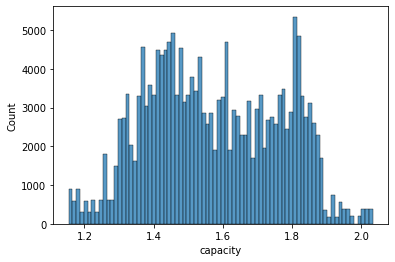

In [ ]:
sns.histplot(data['capacity'])

## Matriz de correlaciones

In [ ]:
# Matriz de correlaciones
corr_data = data.loc[:,data.columns!='ambient_temperature'].corr()
print(corr_data, "\n")

                         cycle  capacity  voltage_measured  current_measured  \
cycle                 1.000000 -0.924433         -0.142041          0.132452   
capacity             -0.924433  1.000000          0.165433         -0.163532   
voltage_measured     -0.142041  0.165433          1.000000         -0.083980   
current_measured      0.132452 -0.163532         -0.083980          1.000000   
temperature_measured  0.152562 -0.137249         -0.885815          0.318778   
current_load          0.369781 -0.387503         -0.037141         -0.366280   
voltage_load         -0.185969  0.221651          0.416026         -0.896695   
time                 -0.115680  0.115478         -0.796901          0.358933   
battery              -0.237778  0.045500          0.007748         -0.019430   

                      temperature_measured  current_load  voltage_load  \
cycle                             0.152562      0.369781     -0.185969   
capacity                         -0.137249     -0.3

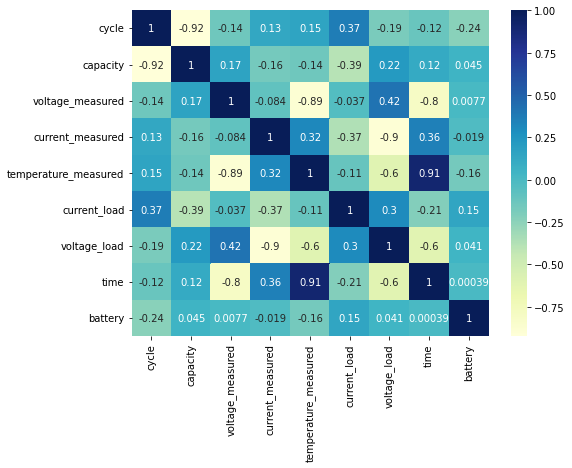

In [ ]:
# Se grafica la matriz de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(corr_data, annot=True, cmap='YlGnBu')
plt.show()

Según la matriz de correlaciones, se observan relaciones fuertes directas entre las variables *temperatura medida y tiempo*, con una correlación del 91%, lo que indica que a medida que aumenta el tiempo, aumenta la temperatura.

Así mismo, se observan relaciones inversas fuertes entre las variables:
- *Ciclo y capacidad* con una correlación del 92%, lo cual tiene sentido, ya que a medida que aumentan los ciclos de carga/descarga, disminuye la capacidad.

- *Temperatura y voltaje medidos* con una correlación del 89%, lo que indica que a medida que aumenta la temperatura, disminuye el voltaje.

- *Tiempo y voltaje medido* con una correlación del 80%, que indica que a medida que aumenta el tiempo, disminuye el voltaje.

- *Voltaje de carga y corriente medida* con una correlación del 90%. A medida que aumenta una de las variables, disminuye la otra.



Text(0.5, 1.0, 'Capacidad de la batería a través de los ciclos')

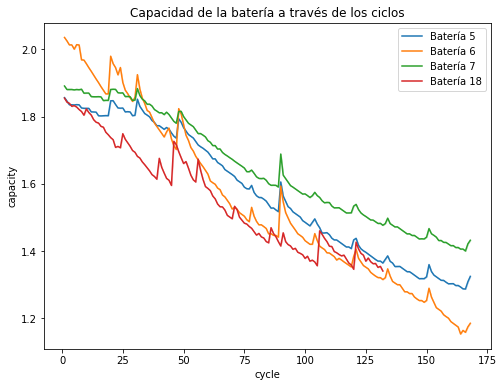

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='cycle', y='capacity', data=data[data['battery'] == 5], label = 'Batería 5')
sns.lineplot(x='cycle', y='capacity', data=data[data['battery'] == 6], label = 'Batería 6')
sns.lineplot(x='cycle', y='capacity', data=data[data['battery'] == 7], label = 'Batería 7')
sns.lineplot(x='cycle', y='capacity', data=data[data['battery'] == 18], label = 'Batería 18')
plt.title("Capacidad de la batería a través de los ciclos")

Se grafica el valor de la capacidad para cada batería a lo largo de los ciclos de carga/descarga. Se observa un comportamiento decreciente, en el cual, a medida que aumentan los ciclos de carga/descarga, el valor de la capacidad de la batería disminuye.

In [ ]:
# Se convierte datetime en fecha 
data['datetime'] = pd.to_datetime(data['datetime'])

Text(0.5, 1.0, 'Voltaje medido de la batería a través del tiempo')

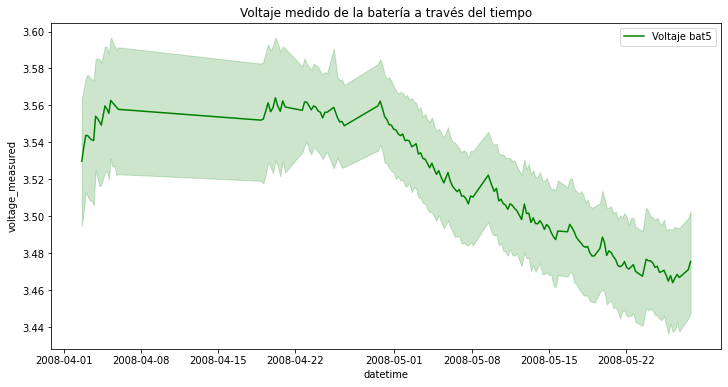

In [ ]:
# Gráfica del voltaje medio a través del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='datetime', y='voltage_measured', data=data[data['battery'] == 5], label = 'Voltaje bat5', color='green')
plt.title("Voltaje medido de la batería a través del tiempo")

Text(0.5, 1.0, 'Corriente medida de la batería a través del tiempo')

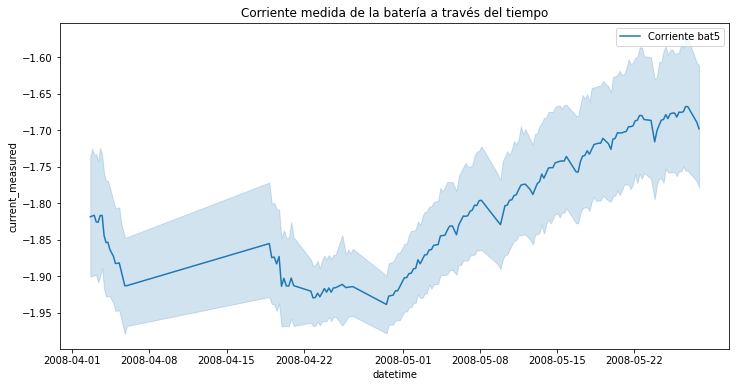

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='datetime', y='current_measured', data=data[data['battery'] == 5], label = 'Corriente bat5')
plt.title("Corriente medida de la batería a través del tiempo")

Text(0.5, 1.0, 'Temperatur medida de la batería a través del tiempo')

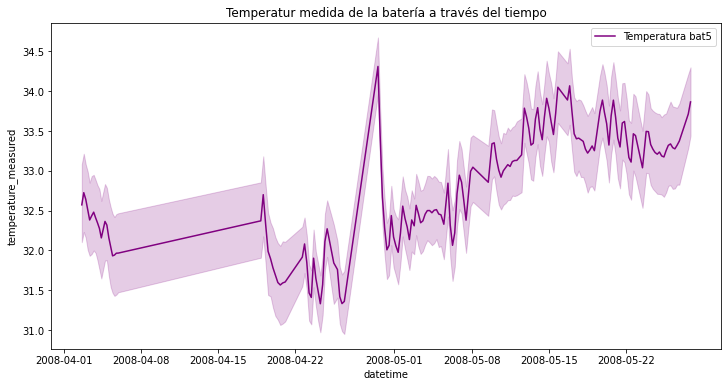

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='datetime', y='temperature_measured', data=data[data['battery'] == 5], label = 'Temperatura bat5', color='purple')
plt.title("Temperatur medida de la batería a través del tiempo")

Dado que en un mismo periodo de tiempo y ciclo de carga/descarga, se tienen diferentes valores de mediciones para el voltaje, corriente y temperatura, se realiza un lineplot que permite visualizar el promedio del valor de la variable a lo largo del tiempo con un intervalo de confianza del 95%.

## Cálculo del estado de salud - SOH

Teniendo en cuenta que el SOH de una batería se puede calcular a partir de la capacidad de la misma, se define el SOH como:

$$ SOH = \frac{Ck}{Co} *100 $$

Donde:

*Ck:* Indica la capadidad actual en el ciclo k

*Co:* Indica la capacidad al inicio de la vida de la batería





In [ ]:
# Se calcula el SOH según la fórmula anterior
bat_5['SOH'] = bat_5['capacity']/bat_5['capacity'][0]
bat_6['SOH'] = bat_6['capacity']/bat_6['capacity'][0]
bat_7['SOH'] = bat_7['capacity']/bat_7['capacity'][0]
bat_18['SOH'] = bat_18['capacity']/bat_18['capacity'][0]

In [ ]:
data = pd.concat([bat_5, bat_6, bat_7, bat_18])

In [ ]:
data.describe()

,cycle,ambient_temperature,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,battery,SOH
count,185721.000000,185721.0,185721.000000,185721.000000,185721.000000,185721.000000,185721.000000,185721.000000,185721.000000,185721.000000,185721.000000
mean,82.838758,24.0,1.574863,3.497219,-1.832569,32.378997,1.465434,2.366494,1546.379935,8.252799,0.824538
std,45.692247,0.0,0.190633,0.251691,0.561405,4.027737,1.226874,0.751377,906.958628,4.743428,0.107054
min,1.000000,24.0,1.153818,1.737030,-2.029098,22.350256,-2.000000,0.000000,0.000000,5.000000,0.566893
25%,45.000000,24.0,1.426025,3.377653,-2.011418,29.570621,1.998200,2.410000,764.797000,5.000000,0.746576
50%,81.000000,24.0,1.559634,3.500859,-2.009015,32.355737,1.998800,2.558000,1537.031000,6.000000,0.821478
75%,120.000000,24.0,1.741850,3.655751,-1.989974,35.420677,1.999000,2.718000,2307.485000,7.000000,0.917934
max,168.000000,24.0,2.035338,4.233325,0.014306,42.332522,2.000000,4.249000,3690.234000,18.000000,1.000000


Text(0.5, 1.0, 'SOH de la batería a través de los ciclos')

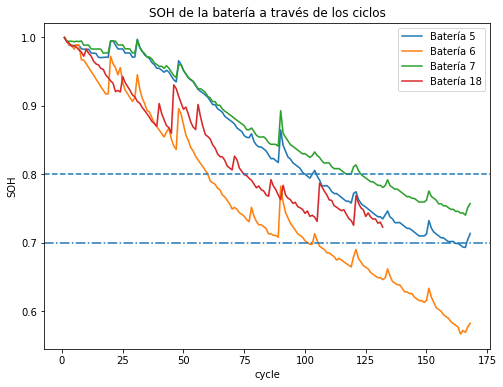

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='cycle', y='SOH', data=data[data['battery'] == 5], label = 'Batería 5')
sns.lineplot(x='cycle', y='SOH', data=data[data['battery'] == 6], label = 'Batería 6')
sns.lineplot(x='cycle', y='SOH', data=data[data['battery'] == 7], label = 'Batería 7')
sns.lineplot(x='cycle', y='SOH', data=data[data['battery'] == 18], label = 'Batería 18')
plt.axhline(0.8, linestyle='--')
plt.axhline(0.7, linestyle='-.')
plt.title("SOH de la batería a través de los ciclos")

Se observa que cada una de las baterías tiene un estado de salud (SOH) del 100% al inicio de la vida, es decir, en el ciclo 1. El SOH va disminuyendo a lo largo de los ciclos de carga/descarga de la batería, con algunos picos de regeneración en el estado de salud de la batería.
La gráfica del SOH vs ciclos se complementa a partir de dos líneas: una línea en el 80% y el 70% del SOH, que según la literatura, representa el umbral o límite de la vida útil de la batería.

Se valida cuántos ciclos de carga/descarga tuvo cada una de las baterías y cuál fue el valor de la capacidad inicial para cada una.

In [ ]:
# Se valida el número de ciclos por batería
data.groupby('battery')['cycle'].max()

battery
5     168
6     168
7     168
18    132
Name: cycle, dtype: int64

In [ ]:
# Se valida la capacidad inicial de cada una de las baterías
data.groupby('battery')['capacity'].max()

battery
5     1.856487
6     2.035338
7     1.891052
18    1.855005
Name: capacity, dtype: float64

In [ ]:
# El valor mínimo del SOH de cada batería
data.groupby('battery')['SOH'].min()

battery
5     0.693488
6     0.566893
7     0.740569
18    0.722937
Name: SOH, dtype: float64

Las baterías #5, #6 y #7 se midieron por 168 ciclos y la batería #18, se midió hasta el ciclo 132.

Cada una de las baterías inició con una capacidad diferente. La batería #6 es que muestra mayor capacidad inicial, seguida por la batería #7, luego la batería #5 y finalmente, la batería #18.

## Nuevo dataset

Teniendo en cuenta que las variables de corriente, voltaje y temperatura tienen diferentes valores para el mismo ciclo de carga/descarga, se crea un nuevo dataset con el mínimo, máximo, promedio y desviación estándar de las variables temperatura, voltaje y corriente medidas y voltaje y corriente de carga, además del valor de capacidad para cada ciclo.

In [ ]:
dataset = data.groupby(by=['battery','cycle'])[['temperature_measured', 'voltage_measured', 'current_measured', 'voltage_load', 'current_load']].agg([min, max, np.mean, np.std, statistics.median])
dataset['capacity'] = data.groupby(by=['battery','cycle'])['capacity'].mean()
dataset = dataset.reset_index()
dataset.head()

battery cycle temperature_measured                                  \
                                 min        max       mean       std   
0       5     1            24.325993  38.982181  32.572328  3.495804   
1       5     2            24.685948  39.033398  32.725235  3.435509   
2       5     3            24.734266  38.818797  32.642862  3.388174   
3       5     4            24.652244  38.762305  32.514876  3.395306   
4       5     5            24.518700  38.665393  32.382349  3.404667   

             voltage_measured                      ... voltage_load            \
      median              min       max      mean  ...          max      mean   
0  32.865786         2.612467  4.191492  3.529829  ...        4.206  2.404944   
1  32.968785         2.587209  4.189773  3.537320  ...        4.204  2.399260   
2  32.885532         2.651917  4.188187  3.543737  ...        4.203  2.397969   
3  32.735171         2.592948  4.188461  3.543666  ...        4.203  2.408289   
4  32.588396         2.547420  4.188299  3.542343  ...        4.203  2.408505   

                    current_load                                      capacity  
        std  median          min     max      mean       std  median            
0  0.796974  2.6100      -1.9984 -0.0004 -1.805570  0.591217 -1.9982  1.856487  
1  0.796596  2.6045      -1.9984 -0.0006 -1.804583  0.592561 -1.9982  1.846327  
2  0.797389  2.6020      -1.9984 -0.0004 -1.803575  0.593925 -1.9982  1.835349  
3  0.780677  2.6020      -1.9984 -0.0006 -1.812863  0.581063 -1.9982  1.835263  
4  0.781348  2.6030      -1.9984 -0.0006 -1.812876  0.581067 -1.9982  1.834646  

[5 rows x 28 columns]

Text(0.5, 1.0, 'Promedio de corriente medida de la batería a través de los ciclos')

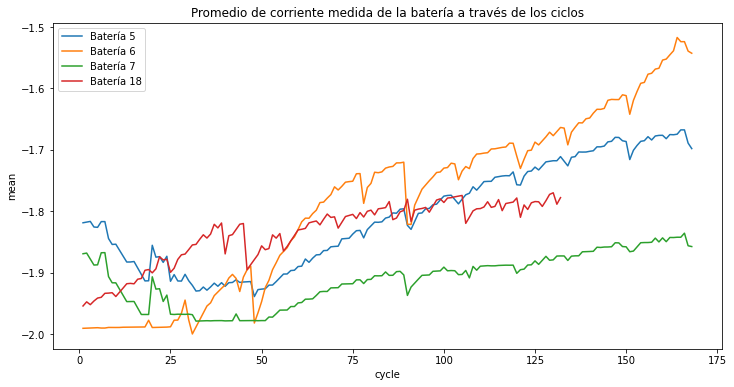

In [ ]:
# Gráfica de la media de la corriente medida a lo largo de los ciclos de carga/descarga
plt.figure(figsize=(12, 6))
sns.lineplot(x='cycle', y=dataset['current_measured']['mean'], data=dataset[dataset['battery']==5], label = 'Batería 5')
sns.lineplot(x='cycle', y=dataset['current_measured']['mean'], data=dataset[dataset['battery']==6], label = 'Batería 6')
sns.lineplot(x='cycle', y=dataset['current_measured']['mean'], data=dataset[dataset['battery']==7], label = 'Batería 7')
sns.lineplot(x='cycle', y=dataset['current_measured']['mean'], data=dataset[dataset['battery']==18], label = 'Batería 18')
plt.title("Promedio de corriente medida de la batería a través de los ciclos")

Text(0.5, 1.0, 'Temperatura media de la batería a través de los ciclos')

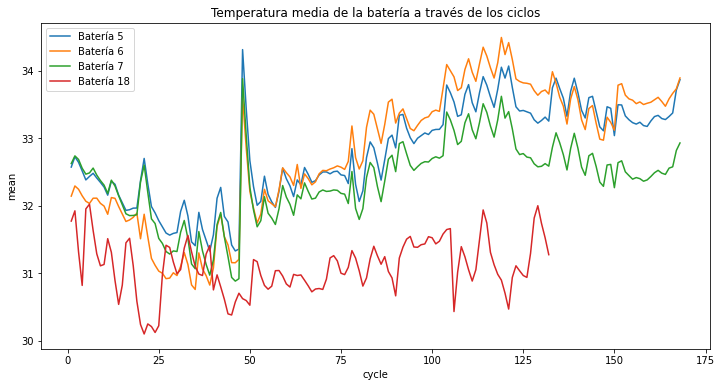

In [ ]:
# Gráfica de la media de la temperatura medida a lo largo de los ciclos de carga/descarga
plt.figure(figsize=(12, 6))
sns.lineplot(x='cycle', y=dataset['temperature_measured']['mean'], data=dataset[dataset['battery']==5], label = 'Batería 5')
sns.lineplot(x='cycle', y=dataset['temperature_measured']['mean'], data=dataset[dataset['battery']==6], label = 'Batería 6')
sns.lineplot(x='cycle', y=dataset['temperature_measured']['mean'], data=dataset[dataset['battery']==7], label = 'Batería 7')
sns.lineplot(x='cycle', y=dataset['temperature_measured']['mean'], data=dataset[dataset['battery']==18], label = 'Batería 18')
plt.title("Temperatura media de la batería a través de los ciclos")

Text(0.5, 1.0, 'Promedio del voltaje medido de la batería a través de los ciclos')

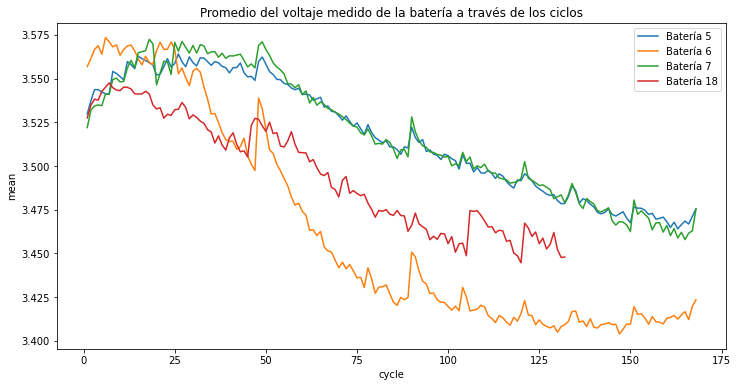

In [ ]:
# Gráfica de la media del voltaje medido a lo largo de los ciclos de carga/descarga
plt.figure(figsize=(12, 6))
sns.lineplot(x='cycle', y=dataset['voltage_measured']['mean'], data=dataset[dataset['battery']==5], label = 'Batería 5')
sns.lineplot(x='cycle', y=dataset['voltage_measured']['mean'], data=dataset[dataset['battery']==6], label = 'Batería 6')
sns.lineplot(x='cycle', y=dataset['voltage_measured']['mean'], data=dataset[dataset['battery']==7], label = 'Batería 7')
sns.lineplot(x='cycle', y=dataset['voltage_measured']['mean'], data=dataset[dataset['battery']==18], label = 'Batería 18')
plt.title("Promedio del voltaje medido de la batería a través de los ciclos")

**Conclusión:** En eslas gráficas, se visualiza el valor promedio de cada una de las variables: corriente, voltaje y temperatura versus los ciclos de carga/descarga.


*Corriente:* En general, se ve que a partir del ciclo 50, la corriente de todas las baterías aumenta a medida que aumentan los ciclos de carga/descarga. Para la batería 6, se ve un aumento más significativo de la corriente respecto a la demás y para la batería 18, el aumento no es tan sigificativo.

*Temperatura:* Se observa que a medida que aumentan los ciclos de carga/descarga la temperatura de la batería aumenta para las baterías 5, 6 y 7, sin embargo, se ve un comportamiento estable de la temperatura, donde se ven picos, pero no un aumento significativo como las otras baterías.
Cabe destacar que en las baterías 5, 6 y 7 también se observa un pico de temperatura aproximadamente en el ciclo 50, donde la temperatura pasa de más o menos 31 °C a 34°C.

*Voltaje:* Todas las baterías muestran que a medida que aumentan los ciclos de carga/descarga, el voltaje disminuye. Para las baterías 5 y 7 se observa un comportamiento en el voltaje similar. A la batería 6, se le ve una disminución del voltaje de manera más significativa comparada con las demás.

